In [23]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import cm
from scipy.signal import savgol_filter

In [2]:
path="/lustre/ytzheng/"

Casename1 = 'ASTEX_cold2.6'
Casename11 = 'ASTEX_cold2.6_240x240'
Casename2 = 'ASTEX_warm2.6'
Casename22 = 'ASTEX_warm2.6_240x240'

f1 = xr.open_mfdataset(path + Casename1 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f11 = xr.open_mfdataset(path + Casename11 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f2 = xr.open_mfdataset(path + Casename2 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)
f22 = xr.open_mfdataset(path + Casename22 + '/' + '*N100.nc',
                      combine = 'by_coords',decode_cf = False)

f = xr.open_mfdataset(path + Casename22 + '/' + 'astex_input_Tadv_2.6.nc',
                      combine = 'by_coords',decode_cf = False)

In [3]:
f1 = f1.isel(time = slice(0,60))
f11 = f11.isel(time = slice(0,60))
f2 = f2.isel(time = slice(0,60))
f22 = f22.isel(time = slice(0,60))

nt = f1['time'].size
t_hours = np.arange(nt)

z = f1['z']/1000.

myfontsize = 12

In [5]:
f1

<xarray.Dataset>
Dimensions:               (time: 60, z: 512)
Coordinates:
  * z                     (z) float32 10.5 22.5 37.5 ... 4055.5 4182.2 4320.9
  * time                  (time) float32 165.02083 165.0625 ... 167.47917
Data variables:
    p                     (z) float32 dask.array<chunksize=(512,), meta=np.ndarray>
    SST                   (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    Ps                    (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLDSHD                (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    AREAPREC              (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    CLD245                (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    WMAX                  (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    UMAX                  (time) float32 dask.array<chunksize=(60,), meta=np.ndarray>
    PREC                  (time) float32 dask.array<chunksize=(60,), me

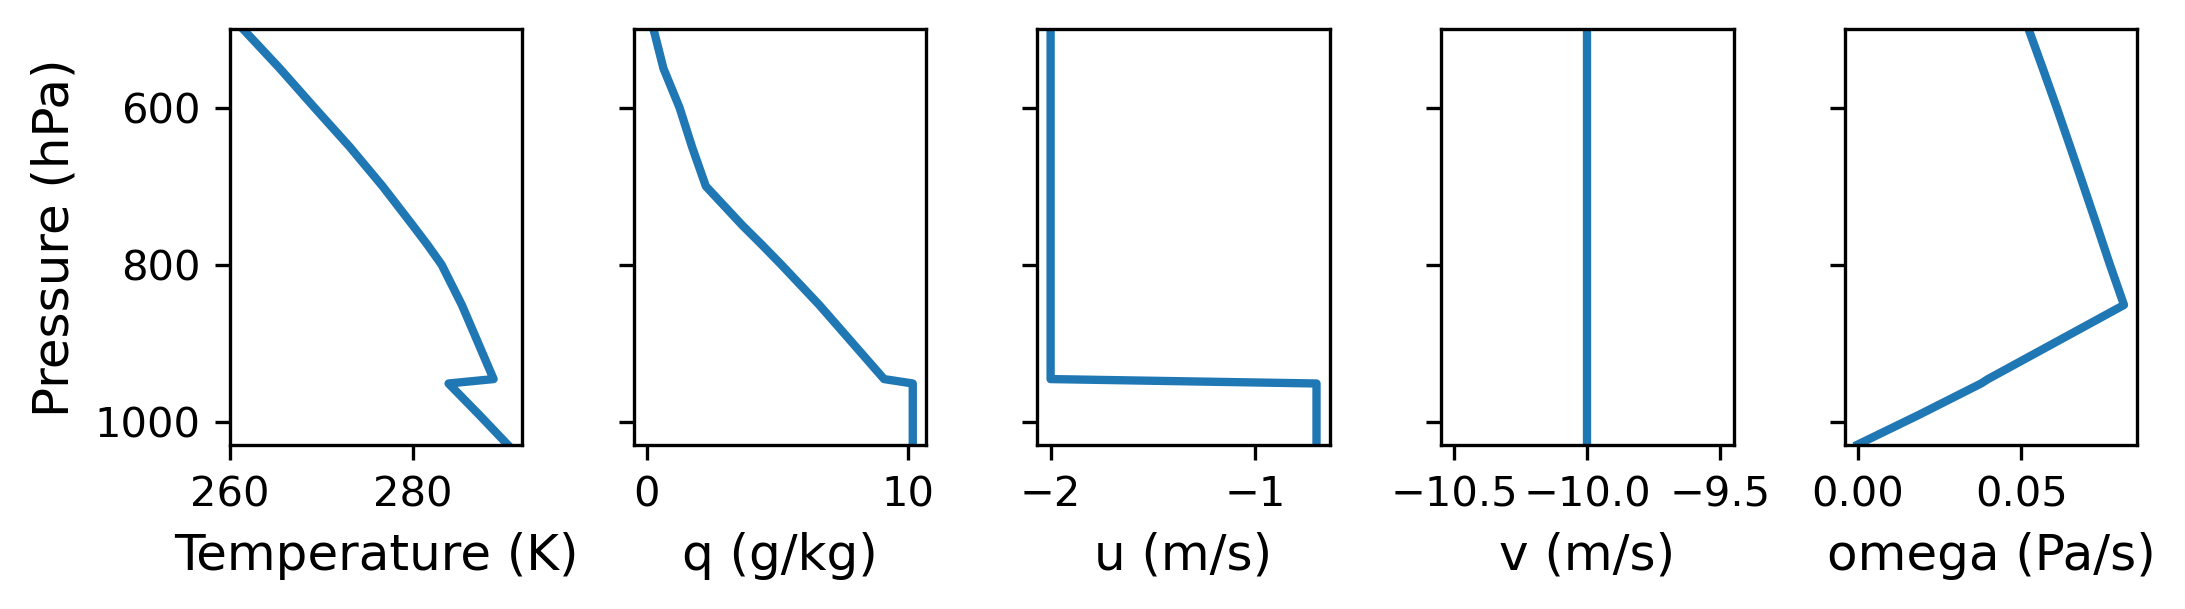

In [72]:
fig, axs = plt.subplots(ncols = 5,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(18/2.54, (5)/2.54), dpi = 300)
plt.tight_layout()

#
axs[0].plot(f['T'][0,:,0,0], f['lev']/100., linewidth=2)
axs[0].invert_yaxis()
axs[0].set_ylim([1030, 500])
axs[0].set_xlim([260, 292])
axs[0].set_ylabel('Pressure (hPa)', fontsize=myfontsize)
axs[0].set_xlabel('Temperature (K)', fontsize=myfontsize)

#
axs[1].plot(1000.*f['q'][0,:,0,0], f['lev']/100., linewidth=2)
axs[1].set_xlabel('q (g/kg)', fontsize=myfontsize)

#
axs[2].plot(f['u'][0,:,0,0], f['lev']/100., linewidth=2)
axs[2].set_xlabel('u (m/s)', fontsize=myfontsize)

#
axs[3].plot(f['v'][0,:,0,0], f['lev']/100., linewidth=2)
axs[3].set_xlabel('v (m/s)', fontsize=myfontsize)

#
axs[4].plot(f['omega'][0,:,0,0], f['lev']/100., linewidth=2)
axs[4].set_xlabel('omega (Pa/s)', fontsize=myfontsize)

fig.savefig('plot_supplementary_result_initial_profile.png', dpi=fig.dpi, bbox_inches='tight')

In [6]:
def plt2D(fig, ax, x, y, z, ztitle, mycmap=cm.coolwarm, mylevels=[0.], extend = 'neither',
         yrange = [0., 2.], cbar = False, xlabel = False, ylabel = False, out = False):
    if len(mylevels) == 1:
#         norm = cm.colors.BoundaryNorm(mylevels,256)
        oax = ax.contourf(x,y,z, cmap = mycmap, extend = extend)
    else:
        oax = ax.contourf(x,y,z, cmap = mycmap, levels = mylevels, extend = extend)
    
    if cbar:
        cbar = fig.colorbar(oax, ax = ax, orientation='vertical', shrink=1.)
        cbar.set_label(ztitle, fontsize=myfontsize)
    
    ax.set_ylim(yrange)
    ax.set_xlim([0, 60])
    if ylabel:
        ax.set_ylabel('Height (km)', fontsize=myfontsize) 
    
    if xlabel:
        ax.set_xlabel('Time (h)', fontsize=myfontsize) 
        
#     ax.grid(True)
    if out:
        return oax

In [7]:
def pltprf(ax, var1, var11, var2, var22, z, zcb1, zcb2, zct1, zct2,
#            xlim,
           xlabel = ' ', ylabel = ' '):
    
    ax.plot(var1, z, linewidth=2, label = 'CADV', color = 'dodgerblue')
    ax.plot(var11, z, linewidth=2, label = 'CADV_L', linestyle = '--',color = 'dodgerblue')
    
    ax.plot(var2, z, linewidth=2, label = 'WADV', color = 'crimson')
    ax.plot(var22, z, linewidth=2, label = 'WADV_L', linestyle = '--', color = 'crimson')
    
#     ax.fill_between(xlim, [zcb1, zcb1], [zct1, zct1], color='dodgerblue', alpha=.3)
#     ax.fill_between(xlim, [zcb2, zcb2], [zct2, zct2], color='crimson', alpha=.3)
    
    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
    
    ax.set_ylim([0., 1.5])
#     ax.set_xlim(xlim)
    
    ax.grid(True)

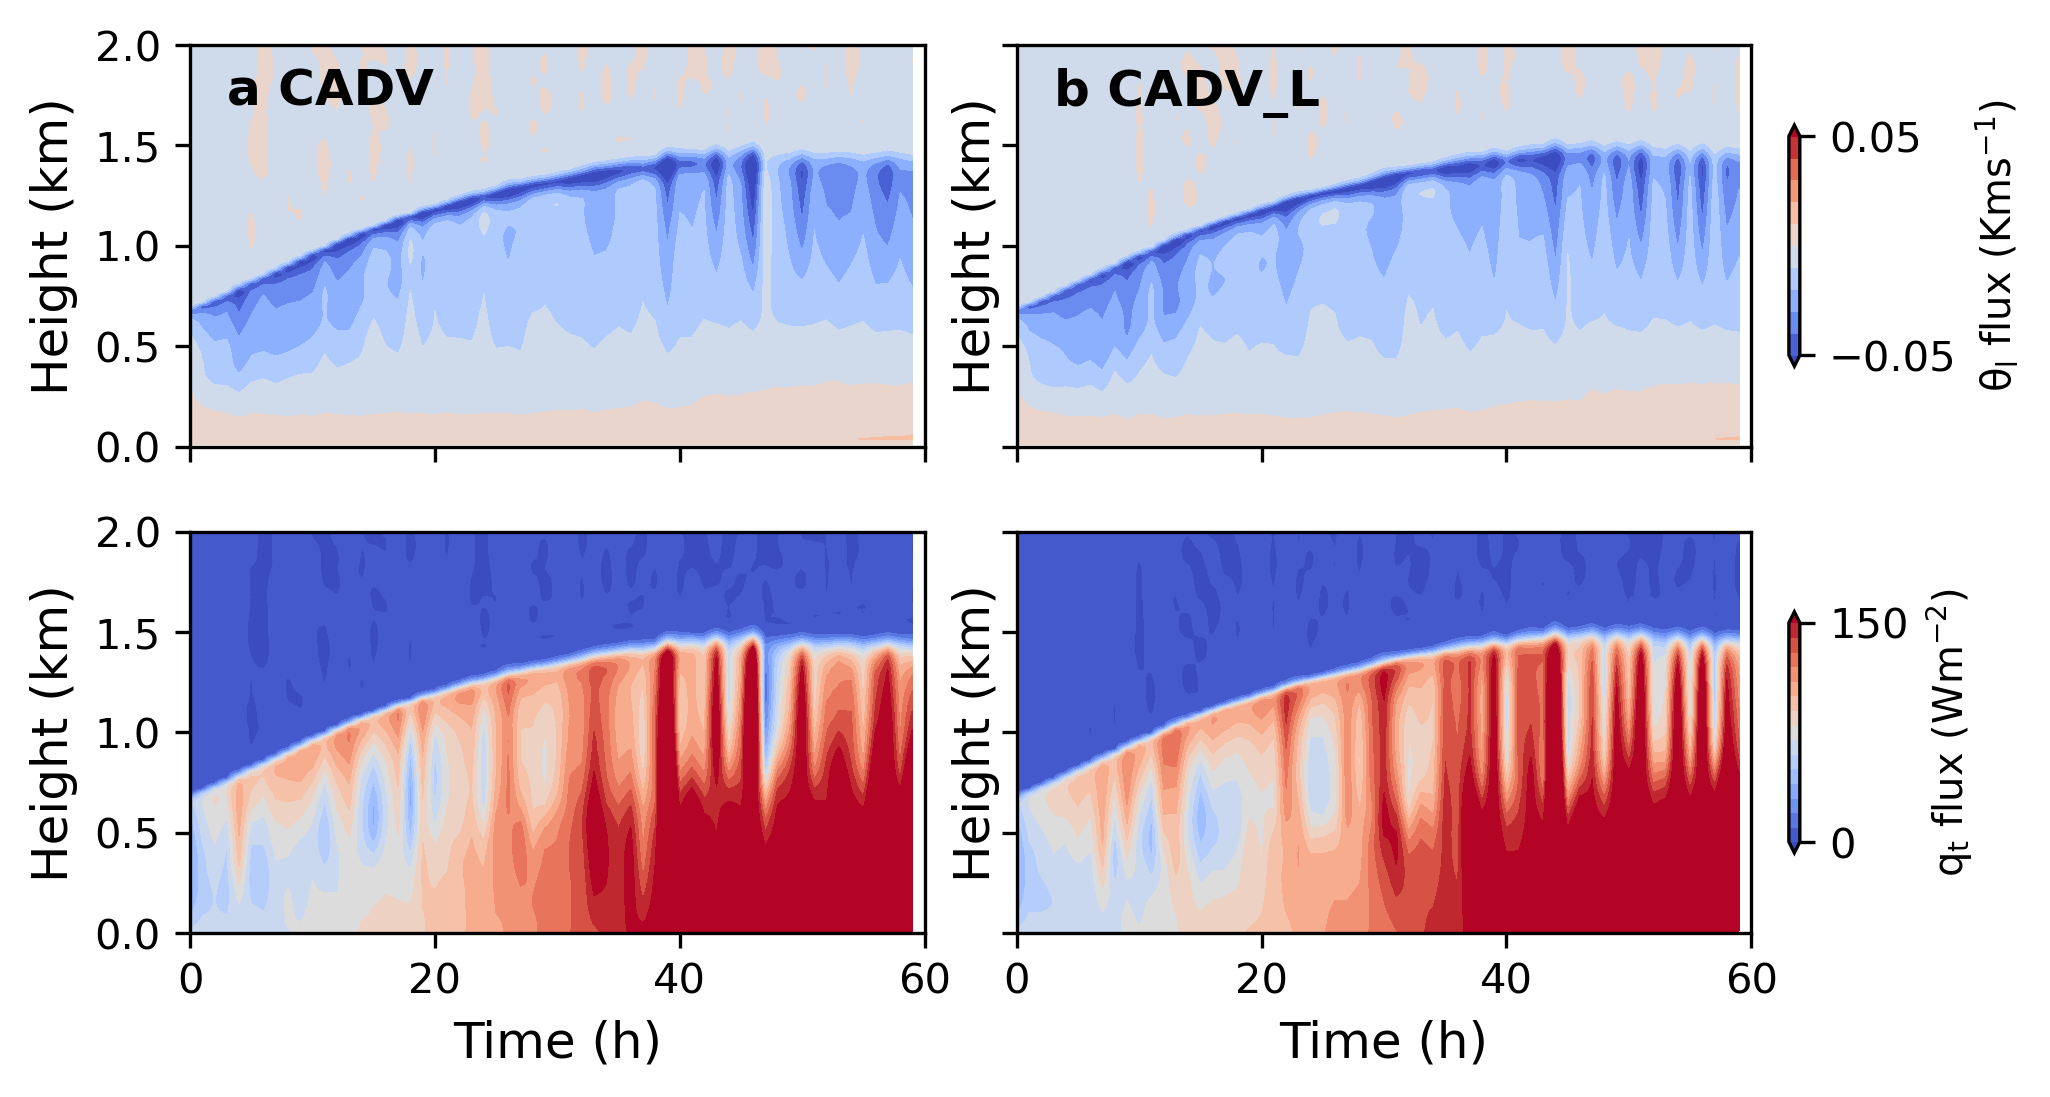

In [53]:
fig, axs = plt.subplots(ncols = 2,
                        nrows = 2,
                        sharex = True, sharey = True,
                        figsize=(18/2.54, (9)/2.54), dpi = 300)
plt.tight_layout()

#
mylevels = np.linspace(-0.05, 0.05, 10 + 1)

oax = plt2D(fig, axs[0,0], t_hours, z, f1['THLFLUX'].T, 'THLFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True)

oax = plt2D(fig, axs[0,1], t_hours, z, f11['THLFLUX'].T, 'THLFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True)

cbar = fig.colorbar(oax,  ax=axs[0], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{\theta_l \ flux \ (Kms^{-1})}$", fontsize=0.8*myfontsize)

#
mylevels = np.linspace(0., 150, 15 + 1)

oax = plt2D(fig, axs[1,0], t_hours, z, f1['QTFLUX'].T, 'QTFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True, xlabel = True)

oax = plt2D(fig, axs[1,1], t_hours, z, f11['QTFLUX'].T, 'QTFLUX', mylevels=mylevels,
            extend='both', ylabel = True, out = True, xlabel = True)

cbar = fig.colorbar(oax,  ax=axs[1], orientation='vertical', shrink=0.6,
                    ticks = [mylevels.min(), mylevels.max()],
                    pad=0.02)
cbar.set_label(r"$\mathrm{q_t \ flux \ (Wm^{-2})}$", fontsize=0.8*myfontsize)


mylabel = np.array((['a CADV','b CADV_L'],['','']))
for i in range(2):
    for j in range (2):
        axs[i,j].text(0.05, 0.85, mylabel[i,j], transform=axs[i,j].transAxes,fontsize=myfontsize, fontweight='bold')

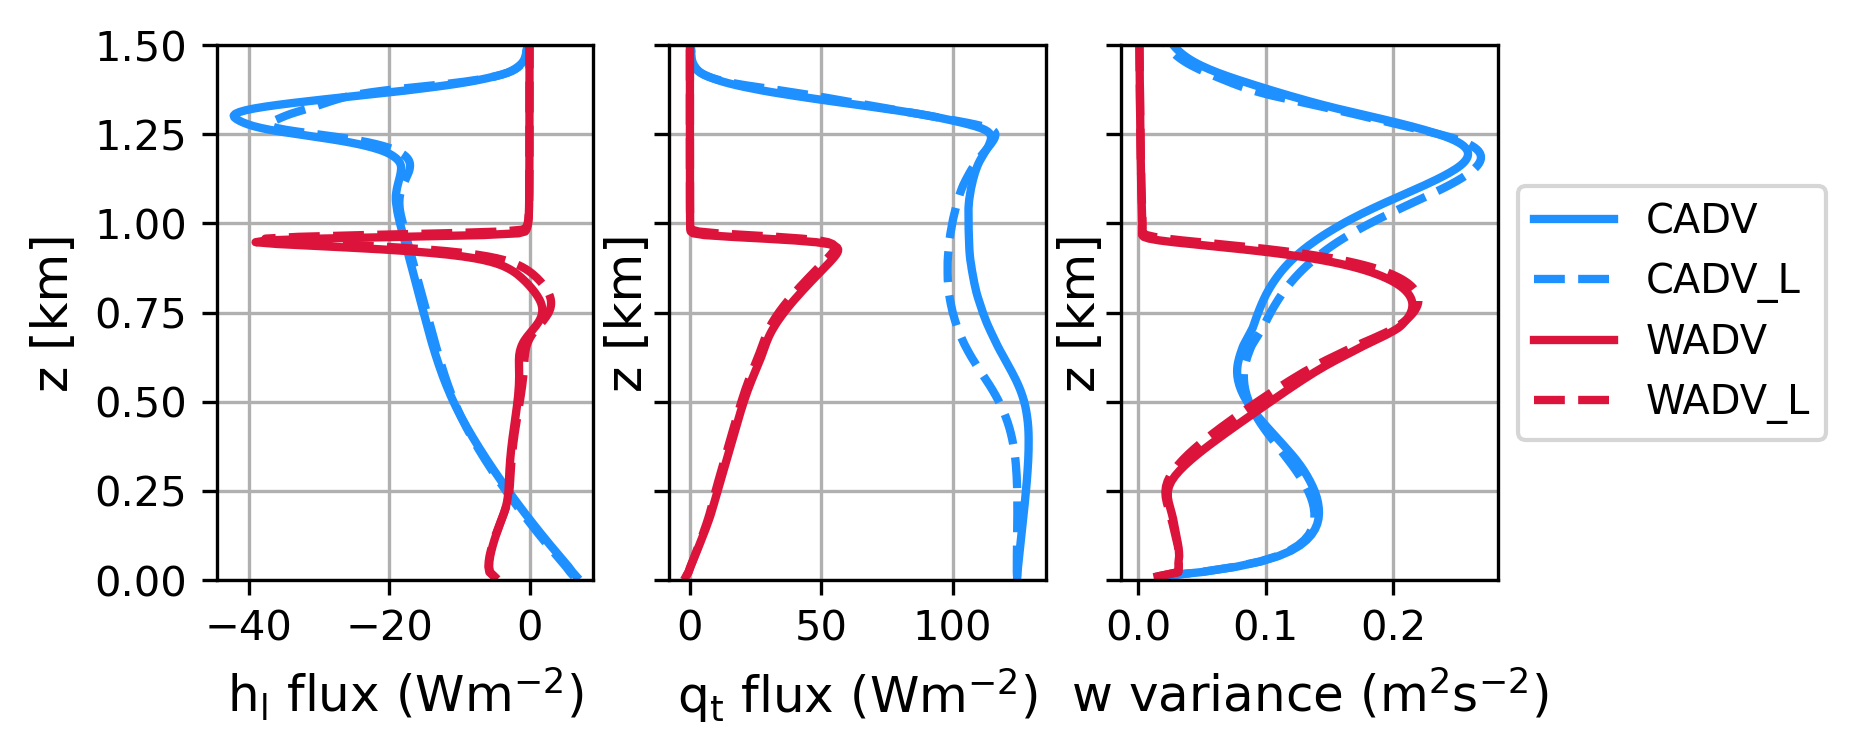

In [16]:
ind = 30
ind_interval = 5

fig, axs = plt.subplots(ncols = 3,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(14/2.54, (6)/2.54), dpi = 300)

pltprf(axs[0], f1['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), 
       f11['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f22['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, 
       f1['zcb'][ind]/1000., f2['zcb'][ind]/1000.,
       f1['zct'][ind]/1000., f2['zct'][ind]/1000.,
#        [287, 297],
       xlabel = r"$\mathrm{h_l \ flux \ (Wm^{-2})}$", ylabel = 'z [km]')

pltprf(axs[1], f1['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f11['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f22['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, 
       f1['zcb'][ind]/1000., f2['zcb'][ind]/1000.,
       f1['zct'][ind]/1000., f2['zct'][ind]/1000.,
#        [287, 297],
       xlabel = r"$\mathrm{q_t \ flux \ (Wm^{-2})}$", ylabel = 'z [km]')

pltprf(axs[2], f1['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f11['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f22['W2'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, 
       f1['zcb'][ind]/1000., f2['zcb'][ind]/1000.,
       f1['zct'][ind]/1000., f2['zct'][ind]/1000.,
#        [287, 297],
       xlabel = r"$\mathrm{w \ variance \ (m^{2}s^{-2})}$", ylabel = 'z [km]')

axs[2].legend(bbox_to_anchor=(1.,0.5), loc="center left", fontsize=0.8*myfontsize)

fig.savefig('plot_supplementary_result_larger_domain.png', dpi=fig.dpi, bbox_inches='tight')

In [13]:
def pltprf2(ax, var1, var2, z, xlabel = ' ', ylabel = ' '):
    
    ax.plot(var1, z, linewidth=1, label = 'Total', color = 'crimson')
    ax.plot(var2, z, linewidth=2, label = 'Subgrid', linestyle = '--',color = 'crimson') 
    
    ax.set_ylabel(ylabel, fontsize=myfontsize) 
    ax.set_xlabel(xlabel, fontsize=myfontsize) 
    
    ax.set_ylim([0., 1.5])
    
    ax.grid(True)

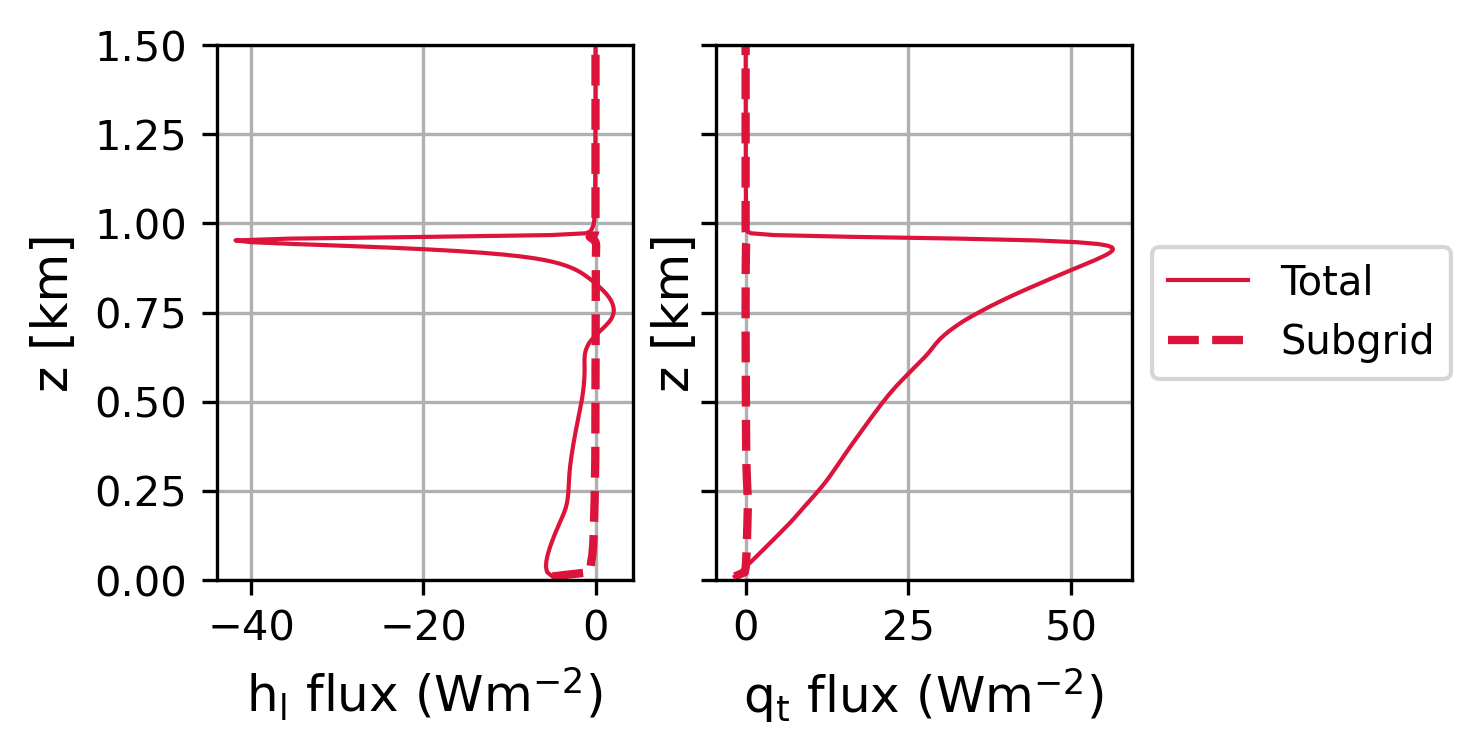

In [15]:
ind = 30
ind_interval = 1

fig, axs = plt.subplots(ncols = 2,
                        nrows = 1,
                        sharex = False, sharey = True,
                        figsize=(10/2.54, (6)/2.54), dpi = 300)

pltprf2(axs[0], f2['TLFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['TLFLUXS'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, 
       xlabel = r"$\mathrm{h_l \ flux \ (Wm^{-2})}$", ylabel = 'z [km]')

pltprf2(axs[1], f2['QTFLUX'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'),
       f2['QTFLUXS'].isel(time = slice(ind - ind_interval, ind + ind_interval)).mean(dim = 'time'), z, 
       xlabel = r"$\mathrm{q_t \ flux \ (Wm^{-2})}$", ylabel = 'z [km]')

axs[1].legend(bbox_to_anchor=(1.,0.5), loc="center left", fontsize=0.8*myfontsize)

fig.savefig('plot_supplementary_result_SGS.png', dpi=fig.dpi, bbox_inches='tight')

In [18]:
def plt1D(ax, x, y1, y11, y2, y22, ytitle
         ,xlabel = 1):
    
    ax.plot(x, y1, linewidth=2, label = 'CADV', color = 'dodgerblue')
    ax.plot(x, y11, linewidth=2, label = 'CADV_L', linestyle = '--',color = 'dodgerblue')
    ax.plot(x, y2, linewidth=2, label = 'WADV', color = 'crimson')
    ax.plot(x, y22, linewidth=2, label = 'WADV_L', linestyle = '--',color = 'crimson')
        
    ax.grid(True)
    ax.set_xlim([0., nt-1])
    ax.set_ylabel(ytitle, fontsize=myfontsize)  # Add a y-label to the axes.
    if xlabel != 0:
        ax.set_xlabel('Time (hours)', fontsize=myfontsize)  # Add a y-label to the axes.

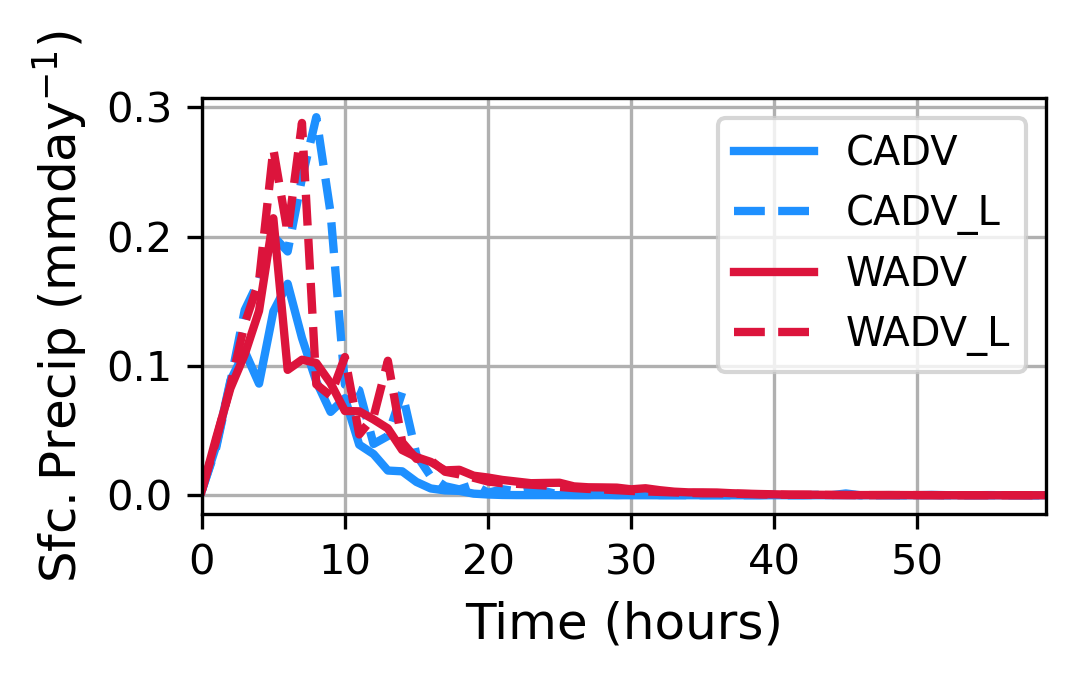

In [19]:
fig, axs = plt.subplots(ncols = 1,
                        nrows = 1,
                        sharex = True, sharey = False,
                        figsize=(9/2.54, (5)/2.54), dpi = 300)

plt.tight_layout()

plt1D(axs, t_hours, f1['PREC'][0:nt], f11['PREC'][0:nt], f2['PREC'][0:nt], f22['PREC'][0:nt],
      r"$\mathrm{Sfc. Precip \ (mm day^{-1})}$", xlabel = 1)
axs.legend(loc="best", fontsize=0.8*myfontsize)

fig.savefig('plot_supplementary_sfc_precip.png', dpi=fig.dpi, bbox_inches='tight')

In [24]:
f1 = f1.where(f1.time < 165. + (41./24.))

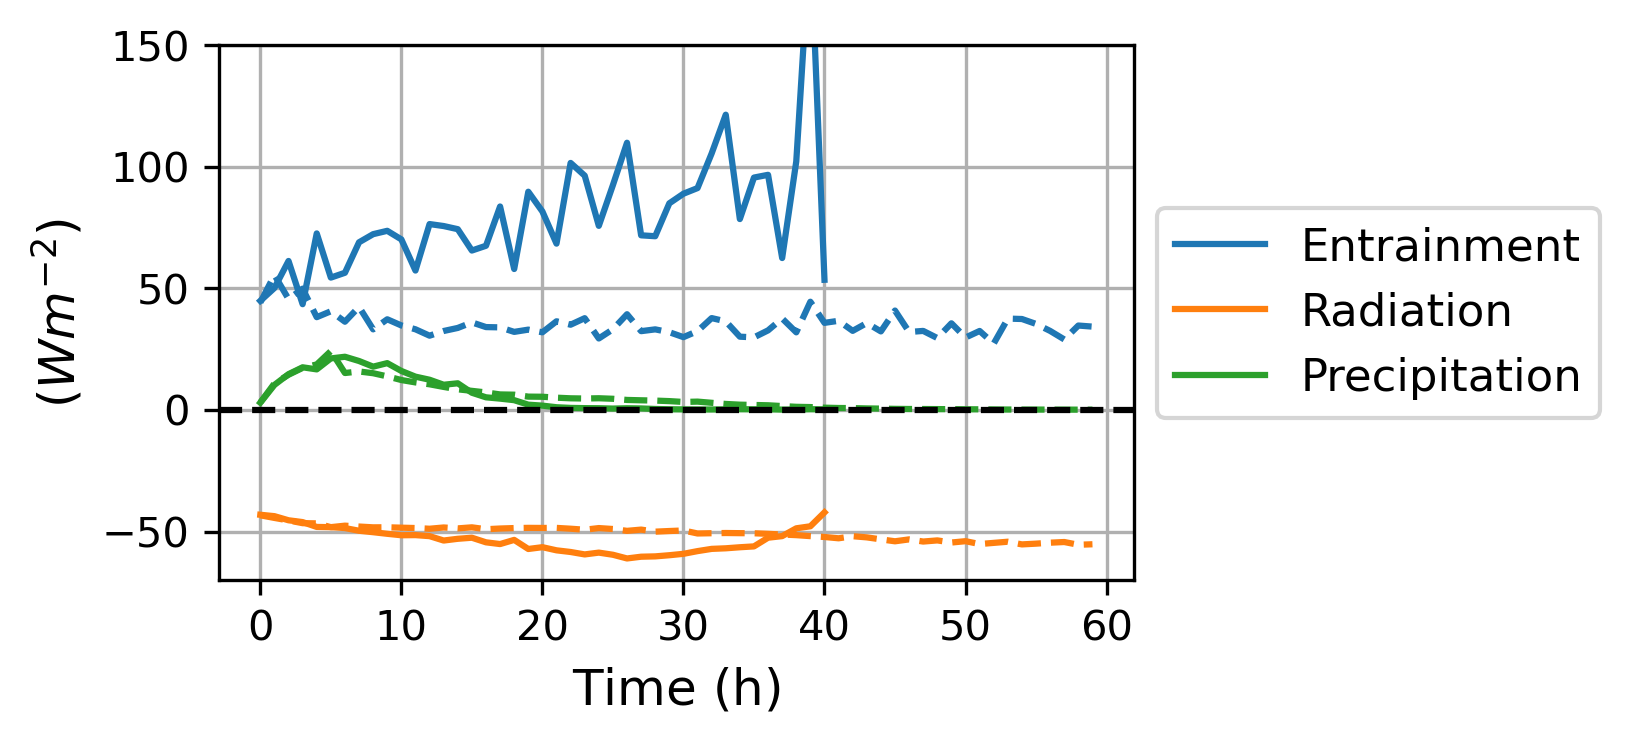

In [31]:
# defining a function for axe plotting
def plt2l(iax, ix, iy, iy1, label, smooth):
    if smooth == 0:
        a = iax.plot(np.arange(iy.time.size), iy, label = label)
        iax.plot(np.arange(iy1.time.size), iy1, 
                 linestyle = '--',color =  a[0].get_color())    
    else:
        a = iax.plot(np.arange(iy.time.size), iy, alpha=0.2)
        iax.plot(np.arange(iy1.time.size), iy1, alpha=0.2, 
                 linestyle = '--',color =  a[0].get_color())    
        
        yhat = savgol_filter(iy, 21, 3)
        yhat1 = savgol_filter(iy1, 21, 3)
        
        iax.plot(np.arange(iy.time.size), yhat, label = label, color = a[0].get_color())
        iax.plot(np.arange(iy1.time.size), yhat1, linestyle = '--',color = a[0].get_color())
        
fig, axs = plt.subplots(1,1,figsize=[10/2.54, (6)/2.54], dpi = 300)

plt2l(axs, t_hours, f1['TVFLX_we_Wm2'], f2['TVFLX_we_Wm2'],
      r"Entrainment", 0)

plt2l(axs, t_hours, -f1['CldRCool'], -f2['CldRCool'],
      r"Radiation", 0)

plt2l(axs, t_hours, f1['Prec_wm2'], f2['Prec_wm2'],
      r"Precipitation", 0)

axs.set_ylabel(r"$(Wm^{-2})}$", fontsize=myfontsize)
axs.set_xlabel(r"$\mathrm{Time \ (h)}$", fontsize=myfontsize)

axs.grid(True)
axs.axhline(y=0,linestyle='--',color = 'black')
axs.set_ylim([-70., 150])

axs.legend(bbox_to_anchor=(1.0, 0.5), loc="center left", fontsize=0.9*myfontsize)

fig.savefig('plot_supplementary_EEW_components.png', dpi=fig.dpi, bbox_inches='tight')